**Importing Libraries**

In [0]:

import pandas as pd 
 # read and wrangle dataframes


import matplotlib.pyplot as plt
 # visualization

import seaborn as sns 
# statistical visualizations and aesthetics

from sklearn.base import TransformerMixin 
# To create new classes for transformations

from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 
# preprocessing 

from sklearn.decomposition import PCA 
# dimensionality reduction

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox 
# data transform

from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# model selection modules

from sklearn.pipeline import Pipeline
 # streaming pipelines

from sklearn.base import BaseEstimator, TransformerMixin 
# To create a box-cox transformation class

from collections import Counter
import warnings

**Importing Dataset**

In [119]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
data = pd.read_csv(url, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# **Exploring Dataset**

1.Count of Null values

2.Shape of dataset

3.Uniques values




In [120]:
#Calculating number of null Values Belonging to each Column

data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [121]:
#Shape of Data

data.shape

(214, 11)

***The dataset consists of 214 observations***

In [122]:


data[10].unique()


array([1, 2, 3, 5, 6, 7])

In [123]:
# Checking Data type of Columns

data.dtypes

0       int64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10      int64
dtype: object

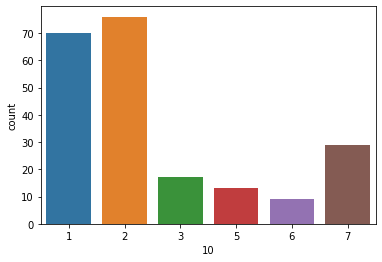

In [124]:
#Counting Number of Values Belonging to each class

data[10].value_counts()



sns.countplot(x=10, data=data)

As we can see The dataset is very very unbalanced. 

**The occurrences of types 1 and 2 constitute more than 67 % of the glass types.**

 

# **Data Preprocessing (Preparing Dataset)**

# **Attribute Information:**

Id number: 1 to 214 (removed from CSV file)

*   RI: refractive index
*   Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
*   Mg: Magnesium
*   Al: Aluminum
*   K: Potassium
*   Ca: Calcium
*   Ba: Barium
*   Fe: Iron
*   Type of glass: (class attribute)  [1-7]
    1.   Building_windows_float_processed
    2.   Building_windows_non_float_processed
    3.   Vehicle_windows_float_processed
    4.   Vehicle_windows_non_float_processed
    5.   Containers
    6.   Tableware
    7.   Headlamps




















# 1. Adding meaningful column/attribute names

In [125]:

names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
data.columns = names
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# 2.Removing unnecessary columns


In [0]:
data = data.drop('Id',1)

In [127]:

data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


# **Statistics of Dataset**

## *Descriptive statistics*

Summarizing the distribution of the numerical variables.

In [128]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


*Above statistics shows that data is across all attributes is not in same range, so we will have to normalize the data first*

The features are not on the same scale.
  I.e. Si has a mean of 72.65 while Fe has a mean value of 0.057.
  Features should be on the same scale for algorithms such as logistic              regression (gradient descent) to converge smoothly.
  Let's go ahead and check the distribution of the glass types.

# **Data Visualization** 

## *1. Using Univariate Plots* 

In [0]:
# Seprating Class labels and Features

features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['glass_type']

X = data[features]

y = data[label]

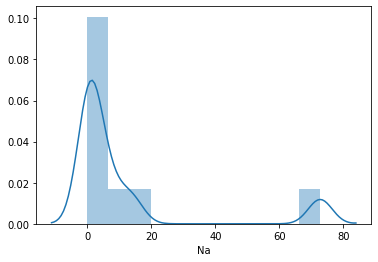

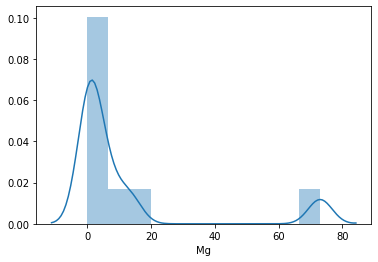

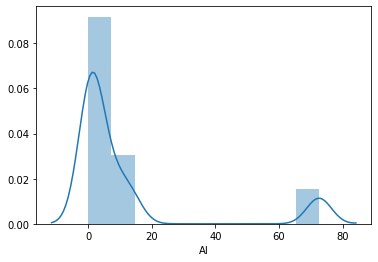

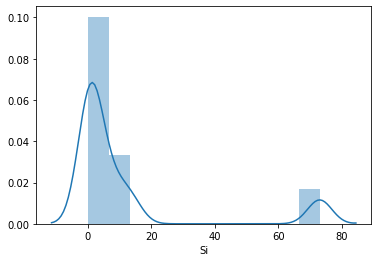

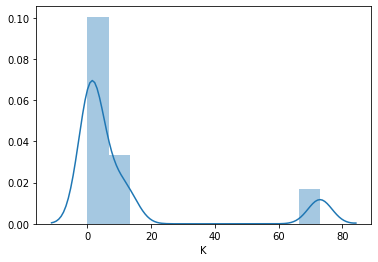

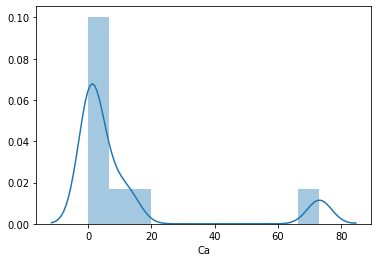

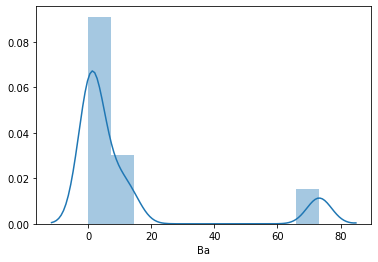

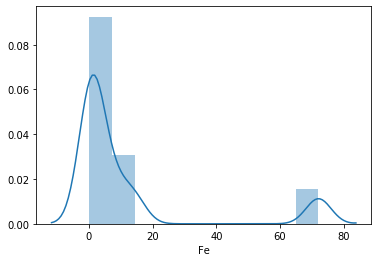

In [130]:
x2 = X.values

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

**Outcomes** 
1. Our dataset is skewed either on positive side or negative side and data is not normalized

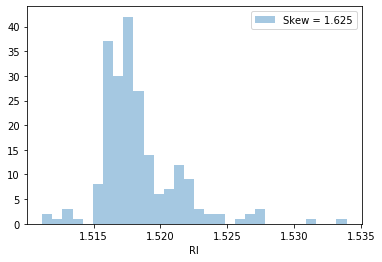

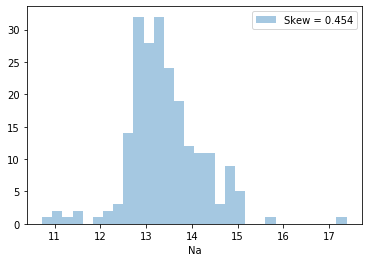

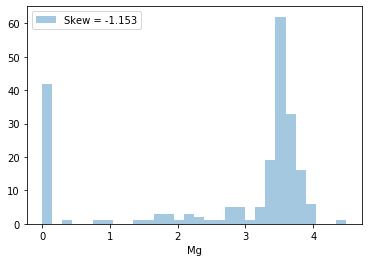

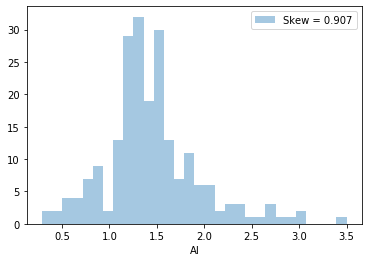

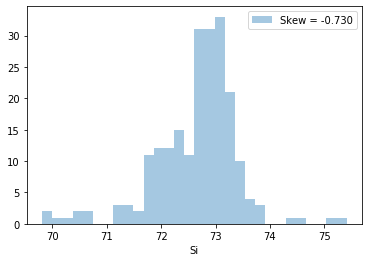

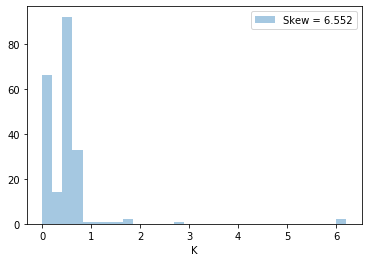

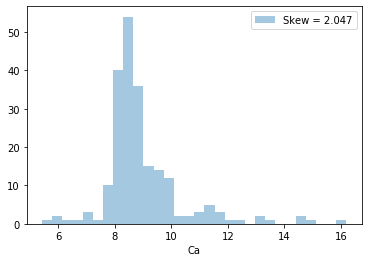

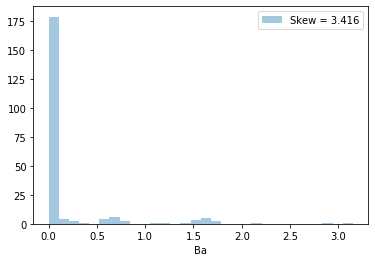

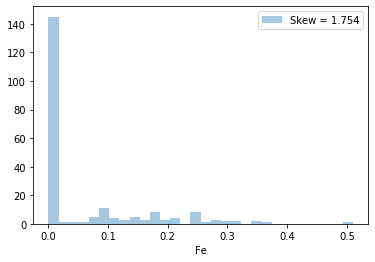

In [131]:
#Trying to gain more Insights about the data


for feat in features:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

**Outcomes** 
1. The distribution of potassium (K) and Barium (Ba) seem to contain many outliers. 
2. The features Fe, Ba, Ca and K are Highly Skewed (They have High skew coefficients). 
3. None of the features follow Normal Distribution (are not normally distributed). 

## *2. Using Multivariate Plots* 

<Figure size 576x576 with 0 Axes>

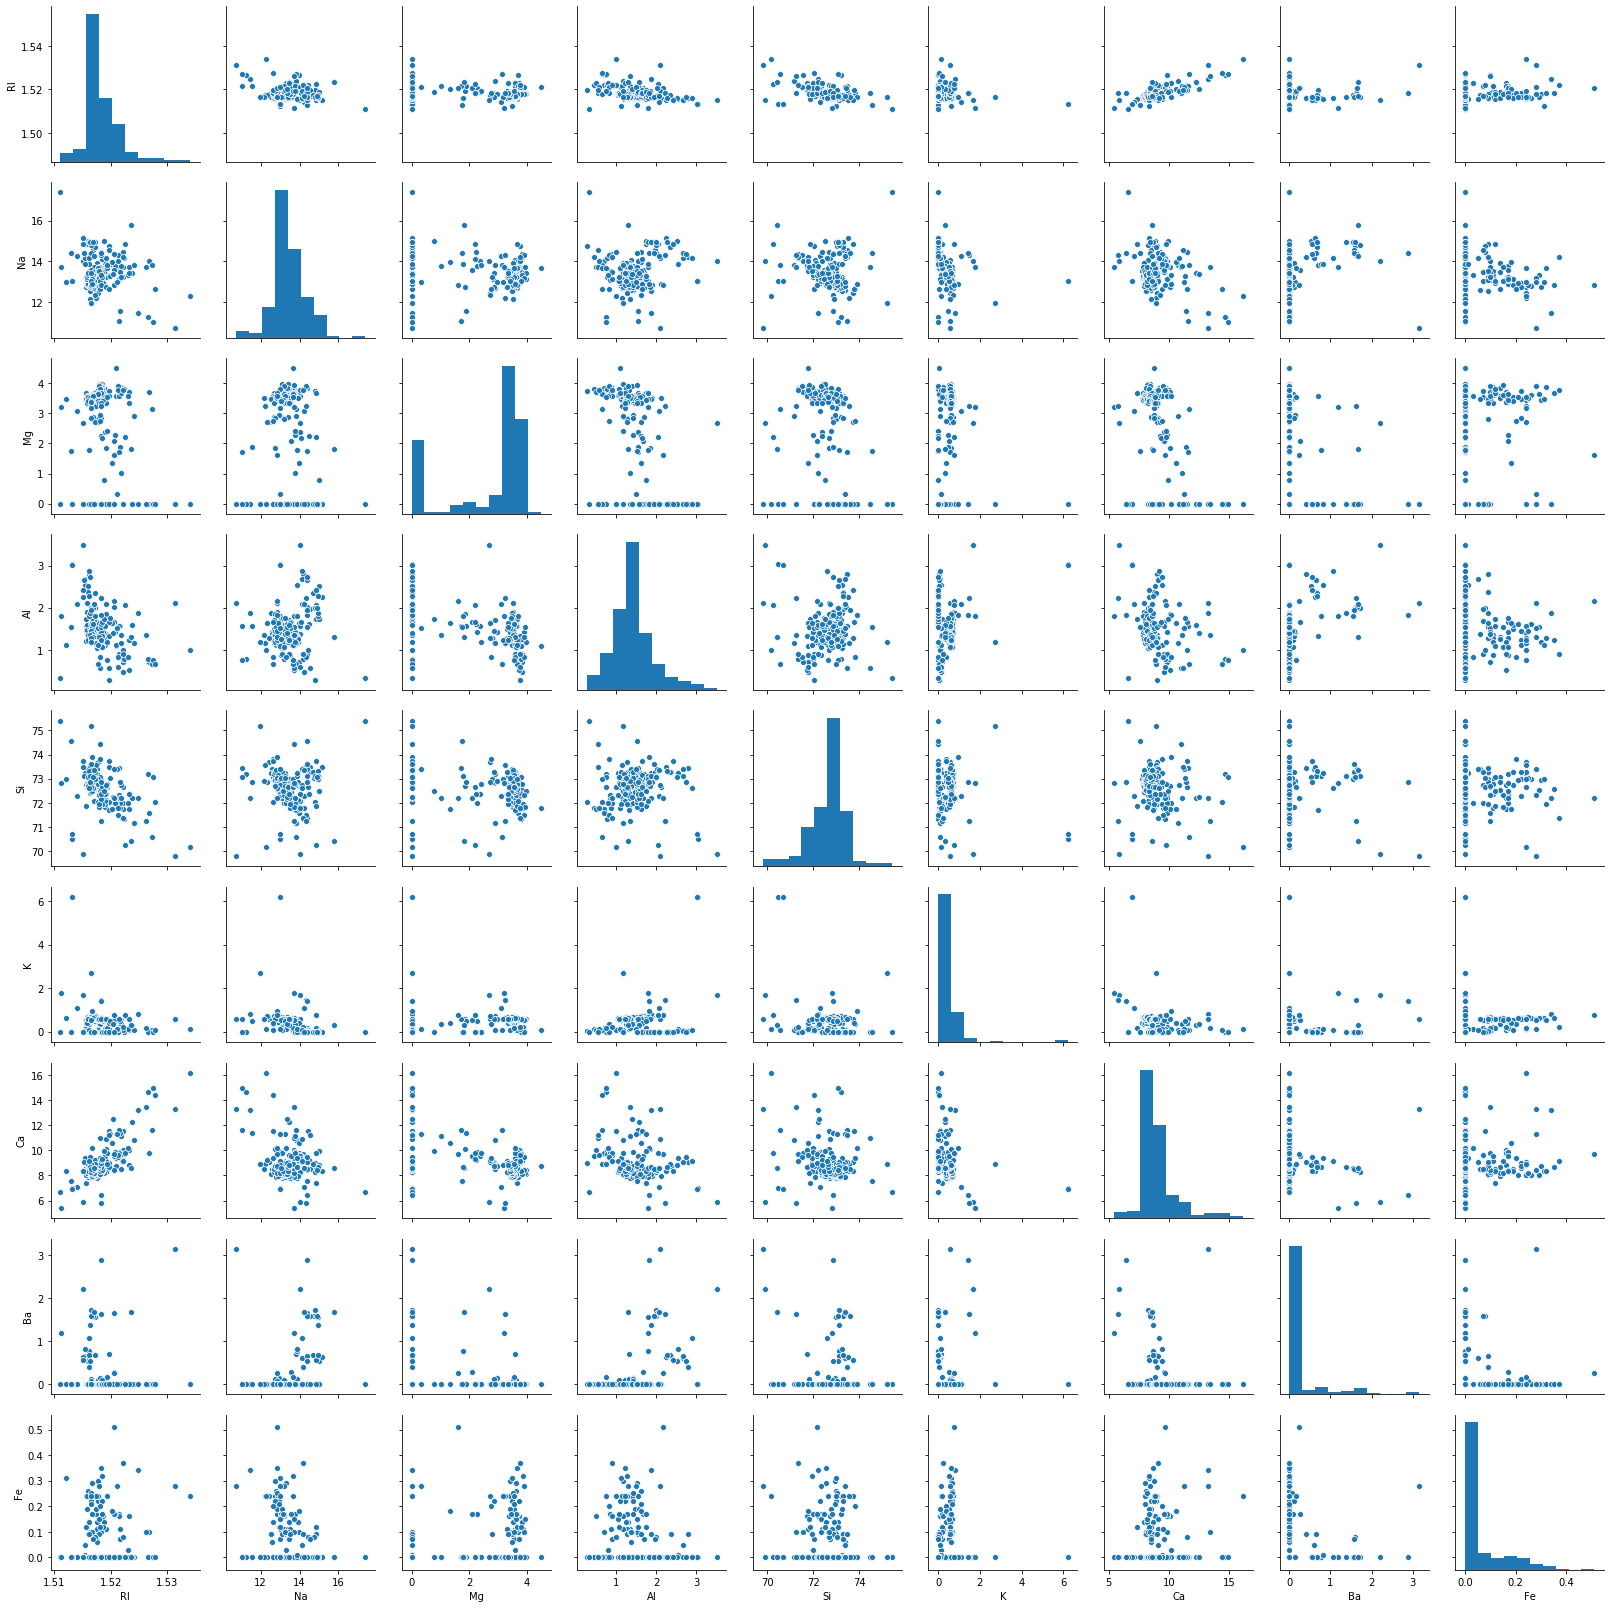

In [132]:
x2 = pd.DataFrame(X)

plt.figure(figsize=(8,8))
sns.pairplot(data=x2)
plt.show()

## *3. Using Correlation Matrix*


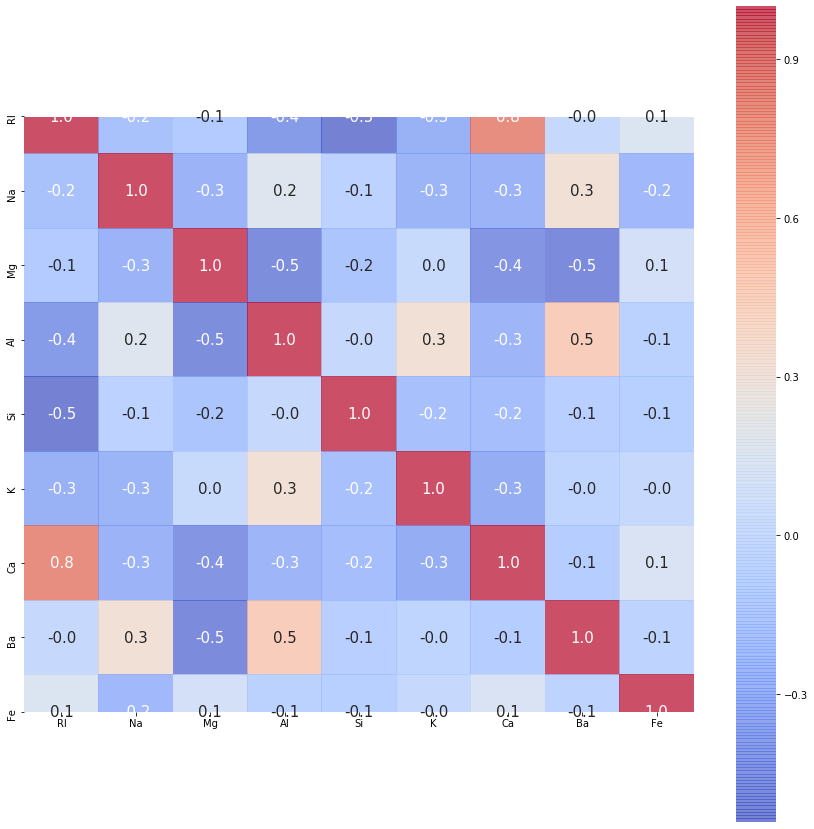

In [133]:

coreleation= X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()

**Outcomes** 

1. AI and Ba have intermediate correlation between each other.
2. RI and Ca have strong correlation between each other. ( This could be a sign to perform Principal component analysis in order to decorrelate some of the input features. )

# **Outlier Detection** 

In [134]:
# Detect observations with more than one outlier

def outlier_hunt(data):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    
    for col in data.columns.tolist():
       
        Q1 = np.percentile(data[col], 25)
        
       
        Q3 = np.percentile(data[col],75)
        
        
        IQR = Q3 - Q1
        
        
        outlier_step = 1.5 * IQR
        
        
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index
        
        
        outlier_indices.extend(outlier_list_col)
        
   
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(data[features]))))   

The dataset contains 14 observations with more than 2 outliers


**Outcomes** 

1. In our data, There exists around 14 observations with multiple outliers.
2. These could harm the efficiency of our learning algorithms. We'll remove them now.

# **Data Treatment** 

In [135]:
#Information about data in hand 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI            214 non-null float64
Na            214 non-null float64
Mg            214 non-null float64
Al            214 non-null float64
Si            214 non-null float64
K             214 non-null float64
Ca            214 non-null float64
Ba            214 non-null float64
Fe            214 non-null float64
glass_type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


**Outcomes** 

1. This dataset is clean; there aren't any missing values in it.

## *1. Removing Outliers*

In [136]:
outlier_indices = outlier_hunt(data[features])
df = data.drop(outlier_indices).reset_index(drop=True)

print(data.shape)

(214, 10)


**Outcomes** 

1. Removing observations with multiple outliers (more than 2) left us with 200 observations to train from.

## *2. Normalizing The Data*

In [0]:
## normalizing/Scalling the data in [0,1] Range 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [138]:
X.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


In [139]:
y.head(2)


,glass_type
0,1
1,1


## *3. Scaling The Features*

In [0]:

from sklearn import preprocessing
X=preprocessing.scale(X)

## **Visualization of Data after Being Preprocessed**

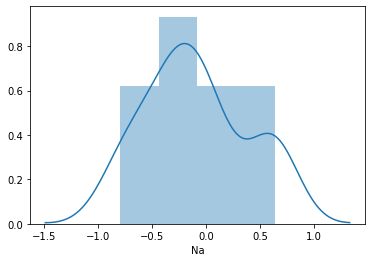

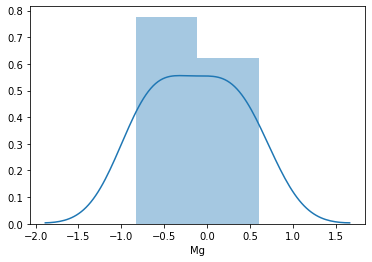

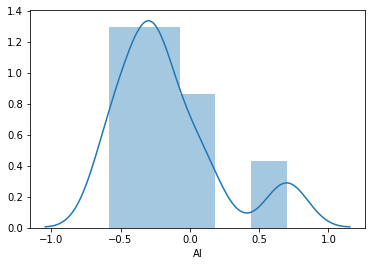

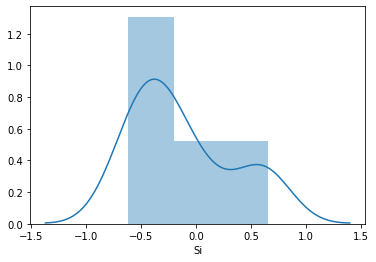

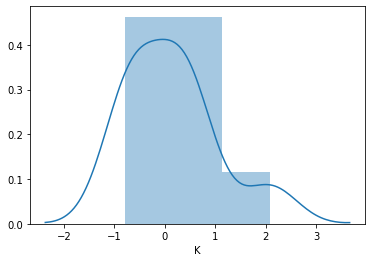

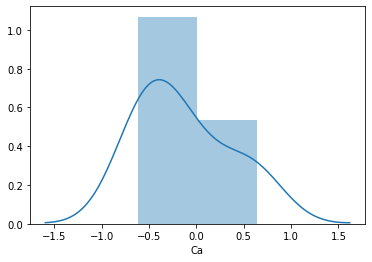

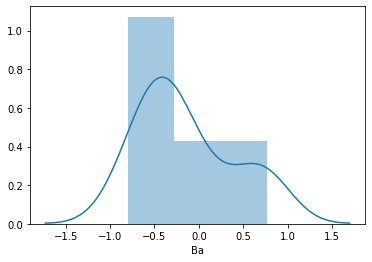

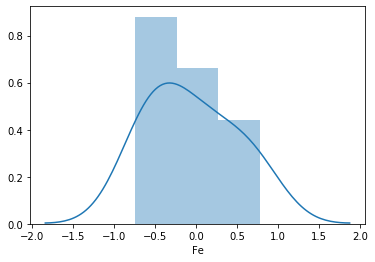

In [141]:
x2 = X


for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

**Outcomes** 

According to Diagrams above, After preprocessing,
1. Skewness is reduced.
2. Data is more normalized.

## **Training set - Test set Split**

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))

Shape of X_train = (160, 9)
Shape of X_test = (54, 9)
Shape of y_train = (160,)
Shape of y_test = (54,)


# **Training Different Machine learning Models** 

## ***1. K-Nearest Neighbors*** 

In [143]:

Scores = []

for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    Scores.append(score)

print(knn.score(X_train,y_train))
print(Scores)

0.65625
[0.6666666666666666, 0.6296296296296297, 0.6851851851851852, 0.6851851851851852, 0.6851851851851852, 0.7222222222222222, 0.7407407407407407, 0.7222222222222222, 0.7407407407407407]


## ***2. Decision Tree*** 

In [144]:

Scores = []

for i in range(1):
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    score = tree.score(X_test,y_test)
    Scores.append(score)

print(tree.score(X_train,y_train))
print(Scores)


1.0
[0.7037037037037037]


## ***3. Logistic Regression*** 

In [145]:

Scores = []

for i in range(1):
    logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=100)
    logistic.fit(X_train, y_train)
    score = logistic.score(X_test,y_test)
    Scores.append(score)
    
print(logistic.score(X_train,y_train))
print(Scores)

0.65
[0.6296296296296297]


## ***4. SVM Classifier (Non-Linear)*** 

In [146]:

Scores = []

for i in range(1):
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    score = svc.score(X_test,y_test)
    Scores.append(score)

print(svc.score(X_train,y_train))
print(Scores)

0.76875
[0.7407407407407407]


# ***Summary***

## Out of all above models:

**Decision Tree**


Decision tree is overfitting with  **:->**

*Training accuracy: 1.0*

*Testing accuracy:  0.7037037037037037*




**SVM (Non Linear Kernal)**

SVM (Non Linear Kernal) is giving best result with:

*Training accuracy: 0.76875*

*Testing accuracy:  0.7407407407407407*